In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df=pd.read_excel('dataset_final.xlsx')
df.head(3)

,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label,fname
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812,0,without_mask_1.jpg
1,2,18.461546,25.806718,25.655944,26.883562,0.797231,0.627642,0.614348,0.586758,0.081968,...,0.000190,0.000158,0.000198,0.000165,0.013800,0.012556,0.014080,0.012841,0,without_mask_10.jpg
2,3,17.975612,24.888646,23.639344,23.941351,0.800654,0.667611,0.716540,0.705741,0.094696,...,0.000161,0.000127,0.000132,0.000130,0.012707,0.011277,0.011473,0.011389,0,without_mask_100.jpg


In [5]:
df.drop('fname',axis=1,inplace=True)

In [6]:
df['label'].unique()

array([0, 1], dtype=int64)

In [7]:
df_data_1=df.loc[df['label']==0]

In [8]:
df_data_2=df.loc[df['label']==1]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553 entries, 0 to 7552
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   serial_no          7553 non-null   int64  
 1   dissimilarity_0    7553 non-null   float64
 2   dissimilarity_45   7553 non-null   float64
 3   dissimilarity_90   7553 non-null   float64
 4   dissimilarity_135  7553 non-null   float64
 5   correlation_0      7553 non-null   float64
 6   correlation_45     7553 non-null   float64
 7   correlation_90     7553 non-null   float64
 8   correlation_135    7553 non-null   float64
 9   homogeneity_0      7553 non-null   float64
 10  homogeneity_45     7553 non-null   float64
 11  homogeneity_90     7553 non-null   float64
 12  homogeneity_135    7553 non-null   float64
 13  contrast_0         7553 non-null   float64
 14  contrast_45        7553 non-null   float64
 15  contrast_90        7553 non-null   float64
 16  contrast_135       7553 

In [10]:
df_data=pd.concat([df_data_1,df_data_2],ignore_index=True)

In [11]:
df_data

,serial_no,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,1,33.571474,37.613824,30.087053,37.102539,0.771983,0.746361,0.809737,0.747152,0.341245,...,5075.587782,0.036918,0.030155,0.037329,0.029864,0.192141,0.173651,0.193207,0.172812,0
1,2,18.461546,25.806718,25.655944,26.883562,0.797231,0.627642,0.614348,0.586758,0.081968,...,1678.201018,0.000190,0.000158,0.000198,0.000165,0.013800,0.012556,0.014080,0.012841,0
2,3,17.975612,24.888646,23.639344,23.941351,0.800654,0.667611,0.716540,0.705741,0.094696,...,1324.597589,0.000161,0.000127,0.000132,0.000130,0.012707,0.011277,0.011473,0.011389,0
3,4,11.001795,11.536333,9.729197,11.648599,0.869841,0.866218,0.894534,0.856053,0.638126,...,1055.424191,0.343982,0.346157,0.359534,0.345615,0.586500,0.588351,0.599612,0.587890,0
4,5,15.650286,17.982019,18.060362,17.958789,0.854187,0.811520,0.816796,0.805573,0.101942,...,758.388765,0.000241,0.000221,0.000243,0.000219,0.015534,0.014856,0.015576,0.014787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7548,7549,16.925538,20.332626,18.604267,19.585180,0.864210,0.829935,0.847647,0.824120,0.137506,...,1280.003693,0.000369,0.000351,0.000394,0.000340,0.019196,0.018735,0.019842,0.018445,1
7549,7550,17.848387,23.827080,24.299426,22.578884,0.775781,0.609099,0.578468,0.635227,0.106233,...,1304.169553,0.000796,0.000733,0.000885,0.000799,0.028216,0.027078,0.029746,0.028260,1
7550,7551,20.951268,24.088787,19.732787,23.811821,0.818473,0.777452,0.844136,0.784300,0.182817,...,1768.716003,0.000897,0.000643,0.001096,0.000663,0.029942,0.025353,0.033113,0.025749,1
7551,7552,14.827614,20.486181,19.381950,18.129424,0.849159,0.771357,0.797813,0.820712,0.211721,...,911.023256,0.003049,0.002118,0.002126,0.002239,0.055214,0.046026,0.046103,0.047319,1


<AxesSubplot:xlabel='dissimilarity_0', ylabel='dissimilarity_45'>

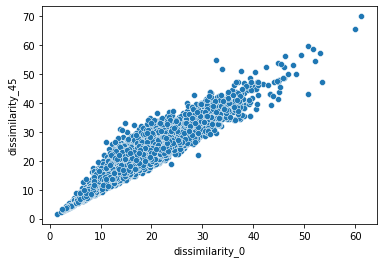

In [12]:
#1
sns.scatterplot(x='dissimilarity_0',y='dissimilarity_45',data=df_data)

In [13]:
#2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [14]:
regr=LinearRegression()

In [15]:
df.columns

Index(['serial_no', 'dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90',
       'dissimilarity_135', 'correlation_0', 'correlation_45',
       'correlation_90', 'correlation_135', 'homogeneity_0', 'homogeneity_45',
       'homogeneity_90', 'homogeneity_135', 'contrast_0', 'contrast_45',
       'contrast_90', 'contrast_135', 'ASM_0', 'ASM_45', 'ASM_90', 'ASM_135',
       'energy_0', 'energy_45', 'energy_90', 'energy_135', 'label'],
      dtype='object')

In [16]:
columns=list(df.columns.values)
columns.remove('dissimilarity_0')
dependent_var=df['dissimilarity_0'].values.reshape(-1,1)

In [17]:
for i in columns:
    independent_var=df[i].values.reshape(-1,1)
    X_train,X_test,y_train,y_test=train_test_split(dependent_var,independent_var,test_size=0.3)
    regr.fit(X_train,y_train)
    prediction=regr.predict(X_test)
    print(mse(prediction,y_test))

4670053.502258134
7.434629269211116
15.760513226771076
7.6533371190605735
0.003325623596213483
0.006730065430499142
0.006265186453115344
0.006266829535474617
0.015873768808163633
0.015858401219874554
0.018761068907506083
0.01662956933212381
137272.54762630328
213857.3972387846
217794.93337160692
216756.65296527895
0.0033030604268640047
0.0036372220728699556
0.00365723943628113
0.0038636018950095894
0.015154684747688748
0.013947274470353769
0.014674600856266986
0.01391588992542139
0.25016360519160946


In [18]:
#4
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logregr=LogisticRegression()

In [19]:
X_train,X_test,y_train,y_test=train_test_split(df_data.drop('label',axis=1),df_data['label'],test_size=0.3)
logregr.fit(X_train,y_train)
prediction=logregr.predict(X_test)


C:\Users\deven\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
accuracy_score(y_test,prediction)

0.9766107678729038

In [21]:
#5 knn regressor
from sklearn.neighbors import KNeighborsRegressor

In [22]:
knn=KNeighborsRegressor(n_neighbors=5)
for i in columns:
    independent_var=df[i].values.reshape(-1,1)
    X_train,X_test,y_train,y_test=train_test_split(dependent_var,independent_var,test_size=0.3)
    knn.fit(X_train,y_train)
    prediction=knn.predict(X_test)
    print(mse(prediction,y_test))

5433219.094545455
8.190524172091921
18.111584012998367
8.249063059695107
0.0035074355582030915
0.007470028211827724
0.007175090393097856
0.0072738687626301484
0.01747383216794075
0.01834288965745416
0.020084612777150953
0.01783393023454462
163917.2023620042
254591.26457792116
259594.26702737418
247745.30267016223
0.0038910800765514053
0.0031572286361091087
0.003986428120983801
0.0032502436433725305
0.016576846355030476
0.016093597029257046
0.016747819732650302
0.014628735501364972
0.27373345101500446


In [24]:
#regression tree
data_2=df_data.drop('label',axis=1)
from sklearn.tree import DecisionTreeRegressor   
regressor = DecisionTreeRegressor(random_state = 0)  
X_train,X_test,y_train,y_test=train_test_split(data_2.drop('energy_135',axis=1),data_2['energy_135'],test_size=0.3)
regressor.fit(X_train, y_train) 
prediction=regressor.predict(X_test)
print(mse(prediction,y_test))

1.0559035807041856e-05
